# DS-SF-34 | 13 | Advanced Metrics | Assignment | Starter Code

## Myopia

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn import preprocessing, linear_model, model_selection, metrics
from sklearn.model_selection import cross_val_score

# TODO model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In this assignment, we will be looking at what contributes to myopia (i.e., nearsightedness) the most.  My parents always told me not to watch TV or play video game as it will affect negatively my vision.  (They were strangely fine with studying!).  But we are data scientists now, so let's go and explain myopia!

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-13-myopia.csv'))

In [3]:
df

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,...,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,...,0,10,34,1,1
1,2,1995,0,6,1,...,1,7,12,1,1
2,3,1991,0,6,1,...,0,10,14,0,0
3,4,1990,1,6,1,...,0,4,37,0,1
4,5,1995,0,5,0,...,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,1,6,0,...,3,14,37,1,0
614,615,1993,0,6,1,...,0,8,10,1,1
615,616,1995,0,6,0,...,0,4,4,1,1
616,617,1991,0,6,1,...,0,15,23,0,0


In [4]:
# TODO
df.isnull().sum().sum()

0

Here's the data dictionnary for this dataset:

| Variable Name | Variable Description | Values/Labels |
|:---|:---|:---|
| `ID` | Subject identifier | Integer (range 1-1503) |
| `STUDYYEAR` | Year subject entered the study | Year |
| `MYOPIC` | Myopia within the first 5 yr of follow up<sup>(a)</sup> | `0 = No`, `1 = Yes` |
| `AGE` | Age at first visit | Years |
| `GENDER` | Gender | `0 = Male`, `1 = Female` |
| `SPHEQ` | Spherical equivalent refraction<sup>(b)</sup> | Diopter |
| `AL` | Axial length<sup>(c)</sup> | mm |
| `ACD` | Anterior chamber depth<sup>(d)</sup> | mm |
| `LT` | Lens thickness<sup>(e)</sup> | mm |
| `VCD` | Vitreous chamber depth<sup>(f)</sup> | mm |
| `SPORTHR` | How many hours per week outside of school the child spent engaging in sports/outdoor activities | Hours per week |
| `READHR` | How many hours per week outside of school the child spent reading for pleasure | Hours per week |
| `COMPHR` | How many hours per week outside of school the child spent playing video/computer games or working on the computer | Hours per week |
| `STUDYHR` | How many hours per week outside of school the child spent reading or studying for school assignments | Hours per week |
| `TVHR` | How many hours per week outside of school the child spent watching television | Hours per week |
| `DIOPTERHR` | Composite of near-work activities | Hours per week  |
| `MOMMY` | Was the subject's mother myopic?<sup>g</sup> | `0 = No`, `1 = Yes` |
| `DADMY` | Was the subject's father myopic? | `0 = No`, `1 = Yes` |
<sup>(a)</sup> MYOPIC is defined as SPHEQ <= -0.75D<br>
<sup>(b)</sup> A measure of the eye's effective focusing power.  Eyes that are "normal" (don't require glasses or contact lenses) have spherical equivalents between -0.25 diopters (D) and +1.00 D. The more negative the spherical equivalent, the more myopic the subject<br>
<sup>(c)</sup> The length of eye from front to back<br>
<sup>(d)</sup> The length from front to back of the aqueous-containing space of the eye between the cornea and the iris<br>
<sup>(e)</sup> The length from front to back of the crystalline lens<br>
<sup>(f)</sup> The length from front to back of the aqueous-containing space of the eye in front of the retina<br>
<sup>(g)</sup> DIOPTERHR = 3 * (READHR + STUDYHR) + 2 * COMPHR + TVHR

> ### Question 1.  `ID` and `STUDYYEAR` do not predict myopia.  Disregard them.  Then, consider two types of inputs.  First, all general inputs (i.e., physical and external inputs) as `X1`.  Second, only the external inputs as `X2`.  Finally, define the response vector `c`

In [5]:
names_X1 = ['AGE', 'GENDER', 'SPHEQ',
    'AL', 'ACD', 'LT','VCD', 
    'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR',
    'MOMMY', 'DADMY']
train_X1 = df[names_X1]

names_X2 = ['AGE','GENDER', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR',
    'MOMMY', 'DADMY']
train_X2 = df[names_X2]

train_c = df.MYOPIC


> ### Question 2.  Run your regression line on `X1` and interpret the `MOMMY` and `DADMY` coefficients

In [6]:
# TODO
model = linear_model.LogisticRegression().\
    fit(train_X1, train_c)
    
    # coefficients
zip(names_X1, np.exp(model.coef_[0]) - 1)

#The odds that a child is myopic is e^(.89) = 2.43 more likely if his/her mother is myopic.
#The odds that a child is myopic is e^(1.07)= 2.91 more likley if his/her father is myopic.

[('AGE', 0.0037974306150880821),
 ('GENDER', 0.70958589944442108),
 ('SPHEQ', -0.96643442423993131),
 ('AL', 0.12309359832050815),
 ('ACD', 1.1653281644479518),
 ('LT', -0.26803332183280615),
 ('VCD', -0.27822137363238242),
 ('SPORTHR', -0.04628950581333946),
 ('READHR', 0.10256772929489655),
 ('COMPHR', 0.051437668697488226),
 ('STUDYHR', -0.12387610496817558),
 ('TVHR', -0.0043767484834950077),
 ('DIOPTERHR', -0.0078564772094251722),
 ('MOMMY', 0.89457763262528589),
 ('DADMY', 1.0684277509194358)]

Answer: TODO

> ### Question 3.  What's the model accuracy?

In [7]:
# TODO
model.score(train_X1, train_c)

0.89320388349514568

Answer: TODO

> ### Question 3.  Use a 5-fold cross-validation to measure the model's accuracy

In [8]:
# TODO
print cross_val_score(model,train_X1, train_c, cv=5).mean()

0.880235929714


Answer: TODO

> ### Question 4.  In the dataset, what's the percentage of myopic cases?

In [9]:
# TODO   #13%
df.MYOPIC.mean()

0.13106796116504854

Answer: TODO

> ### Question 5.  Based on the result above, is your model's accuracy good?

Answer: TODO
No, we could have guessed 0 all the time and done just as well.

In [10]:
1 - model_selection.cross_val_score(model, train_X1 , train_c, cv = 5).mean()

0.11976407028586422

> ### Question 6.  Build a confusion matrix

In [11]:
# TODO

c_hat = model.predict(train_X1)

pd.crosstab(c_hat,
    train_c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class']) 


True Class,0,1
Hypothesized Class,,
0,524,53
1,13,28


> ### Question 7.  What's the model `FPR` and `FNR` (i.e., type I and type II error rates)?

Answer: TODO
FPR = FP / N = 13 / (13+524) = 0.025
FNR = FN / P = 53 / (53+28) = 0.65

> ### Question 8.  What's the trade-off between these two errors?

Answer: TODO
All error went to the FNR.

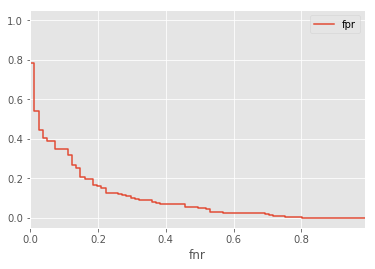

In [12]:
p_hat = pd.Series(model.predict_proba(train_X1).T[1])

def fpr(p):
    c_hat = (p_hat >= p)
    fp = ((c_hat == 1) & (train_c == 0)).sum()
    n = (train_c == 0).sum()
    return 1. * fp / n

def fnr(p):
    c_hat = (p_hat >= p)
    fn = ((c_hat == 0) & (train_c == 1)).sum()
    p = (train_c == 1).sum()
    return 1. * fn / p

fpnrs = pd.DataFrame({'threshold': p_hat,
        'fpr': p_hat.apply(fpr),
        'fnr': p_hat.apply(fnr)},
    columns = ['threshold', 'fpr', 'fnr']).\
    sort_values(by = 'threshold')

fpnrs.plot(x = 'fnr', y = 'fpr')

> ### Question 9.  Run your regression line on `X2` and interpret your results specifically on `SPORTHR`, `READHR`, `COMPHR`, `STUDYHR`, `TVHR`, and `GENDER`.  You might want to use `statsmodels`' `Logit()`

In [13]:
# TODO
sm.Logit(train_c, sm.add_constant(train_X2)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.354054
         Iterations 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      608
Method:                           MLE   Df Model:                            9
Date:                Mon, 19 Jun 2017   Pseudo R-squ.:                 0.08846
Time:                        16:42:10   Log-Likelihood:                -218.81
converged:                       True   LL-Null:                       -240.04
                                        LLR p-value:                 2.700e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7493      1.287     -3.689      0.000      -7.273      -2.226
AGE            0.2744      0.193      1.423      0.155      -0.104       0.652
GENDER         0.4241      0.265      1.599      0.110      -0.096       0.944
SPORTHR       -0.0425      0.018     -2.329      0.020      -0.078      -0.007
READHR         0.0896   9.61e+05   9.32e-08      1.000   -1.88e+06    1.88e+06
COMPHR         0.0295   6.41e+05   4.61e-08      1.000   -1.26e+06    1.26e+06
STUDYHR       -0.1104   9.61e+05  -1.15e-07      1.000   -1.88e+06    1.88e+06
TVHR           0.0048    3.2e+05   1.48e-08      1.000   -6.28e+05    6.28e+05
DIOPTERHR      0.0015    3.2e+05   4.66e-09      1.000   -6.28e+05    6.28e+05
MOMMY          0.8701      0.262      3.317      0.001       0.356       1.384
DADMY          1.0250      0.265      3.864      0.000       0.505       1.545
==============================================================================
"""

Answer: 

The # of hours a person spends on sports, reading, computer, studying or on TV do not increase the odds of being myopic appreciably.  But being female increases the odds by almost 1/2.  Also having parents with myopia increases the chances of a child having myopia.

SPORTHR:  e^(-.04) = .96 
READHR:  e^(.09) = 1.0
COMPHR:  e^(.03) = 1.03
STUDYHR:  e^(-.11) = .9
TVHR:  e^(.005) = 1
GENDER:  e^(.4) = 1.5


> ### Question 10.  Now it's time for regularization!  Use `X1`.  According to `Lasso`, what are the non-significant features?

In [21]:
# TODO

scaler = preprocessing.MinMaxScaler().fit(train_X1)

X1 = pd.DataFrame(scaler.transform(train_X1), columns = train_X1.columns)

gs = model_selection.GridSearchCV(
    estimator = linear_model.LogisticRegression(),
    param_grid = {'C': np.logspace(-10, 10, 21), 'penalty': ['l1']},
    cv = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 0)
)

gs.fit(X1, train_c)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1'], 'C': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
X1.iloc[53,:]

AGE          0.250000
GENDER       1.000000
SPHEQ        0.253007
AL           0.465665
ACD          0.640054
               ...   
STUDYHR      0.000000
TVHR         0.096774
DIOPTERHR    0.101010
MOMMY        1.000000
DADMY        0.000000
Name: 53, dtype: float64

In [24]:
gs.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [27]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
model = gs.best_estimator_.fit(X1, train_c)

In [30]:
print model.intercept_
zip(train_X1, np.exp(model.coef_[0]) - 1)


[ 0.08843156]


[('AGE', 0.0),
 ('GENDER', 0.75145021679469171),
 ('SPHEQ', -0.99999948048819598),
 ('AL', 0.0),
 ('ACD', 2.33828798410359),
 ('LT', 0.0),
 ('VCD', 0.0),
 ('SPORTHR', -0.70094135450771722),
 ('READHR', 0.70208145915666886),
 ('COMPHR', 0.0),
 ('STUDYHR', -0.44440882281721727),
 ('TVHR', 0.0),
 ('DIOPTERHR', 0.0),
 ('MOMMY', 0.93860281662684897),
 ('DADMY', 1.233532862025438)]

Answer: TODO

> ### Question 11.  What is your conclusions about your parents' claims?

Answer: TODO

> ### Question 12.  Draw the ROC curve of your best tuned model

In [ ]:
# TODO
p_hat = model.predict_proba(train_X1).T[1]
fpr, tpr, thresholds = metrics.roc_curve(train_c, p_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC")
plt.legend(loc = 'lower right')